In [1]:
# Install gdown
!pip install --quiet gdown

# Import gdown
import gdown


In [2]:
# Define the file ID and output path
file_id = '1lmfCfcAMZQYINCAqIyqMPDZt6WbY_ESI'
output = 'kaggle_survey_2017_2021.csv'

# Download the dataset
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1lmfCfcAMZQYINCAqIyqMPDZt6WbY_ESI
To: /content/kaggle_survey_2017_2021.csv
100%|██████████| 97.4M/97.4M [00:01<00:00, 49.3MB/s]


'kaggle_survey_2017_2021.csv'

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv(output)

# Display the first few rows
df.head()


/tmp/ipython-input-853289664.py:4: DtypeWarning: Columns (0,1,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Separate categorical and numeric columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Fill categorical columns with 'Unknown'
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

# Fill numeric columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Quick check
df.isnull().sum()


,0
-,0
Time from Start to Finish (seconds),0
Q1,0
Q2,0
Q3,0
...,...
Q38_B_Part_6,0
Q38_B_Part_7,0
Q38_B_Part_9,0
Q38_B_Part_11,0


In [5]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")


Removed 4456 duplicate rows.


In [6]:
from sklearn.preprocessing import LabelEncoder

# Standardize text: lowercase + strip spaces
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

# Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [8]:
for col in cat_cols[:5]:  # show first 5 categorical columns
    print(f"Column: {col}")
    print("Unique values (first 10) after encoding:", df[col].unique()[:10])
    print("-"*50)


Column: -
Unique values (first 10) after encoding: [1 0 2]
--------------------------------------------------
Column: Time from Start to Finish (seconds)
Unique values (first 10) after encoding: [1170 1100  996 1113  801  995   12  175  705  263]
--------------------------------------------------
Column: Q1
Unique values (first 10) after encoding: [12  7  1  6  2  0  3  5  4 10]
--------------------------------------------------
Column: Q2
Unique values (first 10) after encoding: [ 9  3 10  5  6  7  2  1  4  0]
--------------------------------------------------
Column: Q3
Unique values (first 10) after encoding: [26 27 28 47 39 56 68  2 44 21]
--------------------------------------------------


In [12]:
# ---------- STEP 08: Polished Insights for Portfolio ----------

# For single-column questions, check if the dataset has a mapping file or create manual mapping
# Example mapping (you should update these with correct survey values)
country_map = {27:'United States', 75:'India', 46:'Germany', 10:'Brazil', 56:'Canada'}
gender_map = {1:'Male', 2:'Female', 3:'Other', 4:'Prefer not to say', 5:'Other'}
experience_map = {0:'<1 yr', 1:'1-2 yrs', 2:'2-3 yrs', 3:'3-4 yrs', 7:'5-10 yrs', 10:'10+ yrs'}  # extend as needed
education_map = {0:'High School', 5:'Bachelors', 9:'Masters', 19:'PhD', 35:'Other'}  # extend as needed

# Map the numeric codes to readable labels
top_countries_readable = df['Q3'].map(country_map).value_counts().head(5)
gender_dist_readable = df['Q2'].map(gender_map).value_counts()
experience_dist_readable = df['Q6'].map(experience_map).value_counts()
education_dist_readable = df['Q5'].map(education_map).value_counts()

# Tools: already combined in previous step
tool_cols = [col for col in df.columns if col.startswith('Q7_Part')]
tools_data = df[tool_cols].apply(lambda x: x.value_counts()).fillna(0)
tools_sum = tools_data.sum(axis=1).sort_values(ascending=False).head(5)

# Display polished insights
print("📌 Top 5 Countries:\n", top_countries_readable)
print("\n📌 Gender Distribution:\n", gender_dist_readable)
print("\n📌 Experience Levels:\n", experience_dist_readable)
print("\n📌 Education Levels:\n", education_dist_readable)
print("\n📌 Top 5 Tools Used:\n", tools_sum)


📌 Top 5 Countries:
 Q3
United States    23936
India            12682
Germany           5532
Brazil            3502
Canada            3299
Name: count, dtype: int64

📌 Gender Distribution:
 Q2
Female               45220
Other                36508
Male                  9560
Prefer not to say       74
Name: count, dtype: int64

📌 Experience Levels:
 Q6
5-10 yrs    15995
1-2 yrs     13925
10+ yrs      9683
2-3 yrs      7874
3-4 yrs      6064
<1 yr        2651
Name: count, dtype: int64

📌 Education Levels:
 Q5
Other          21237
Masters        16167
Bachelors       8267
PhD             8224
High School     4013
Name: count, dtype: int64

📌 Top 5 Tools Used:
 1    846774.0
0    286272.0
2     89105.0
3         1.0
dtype: float64


/tmp/ipython-input-1921338444.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1921338444.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1921338444.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1921338444.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1921338444.py:56: FutureWarning: 

Passin

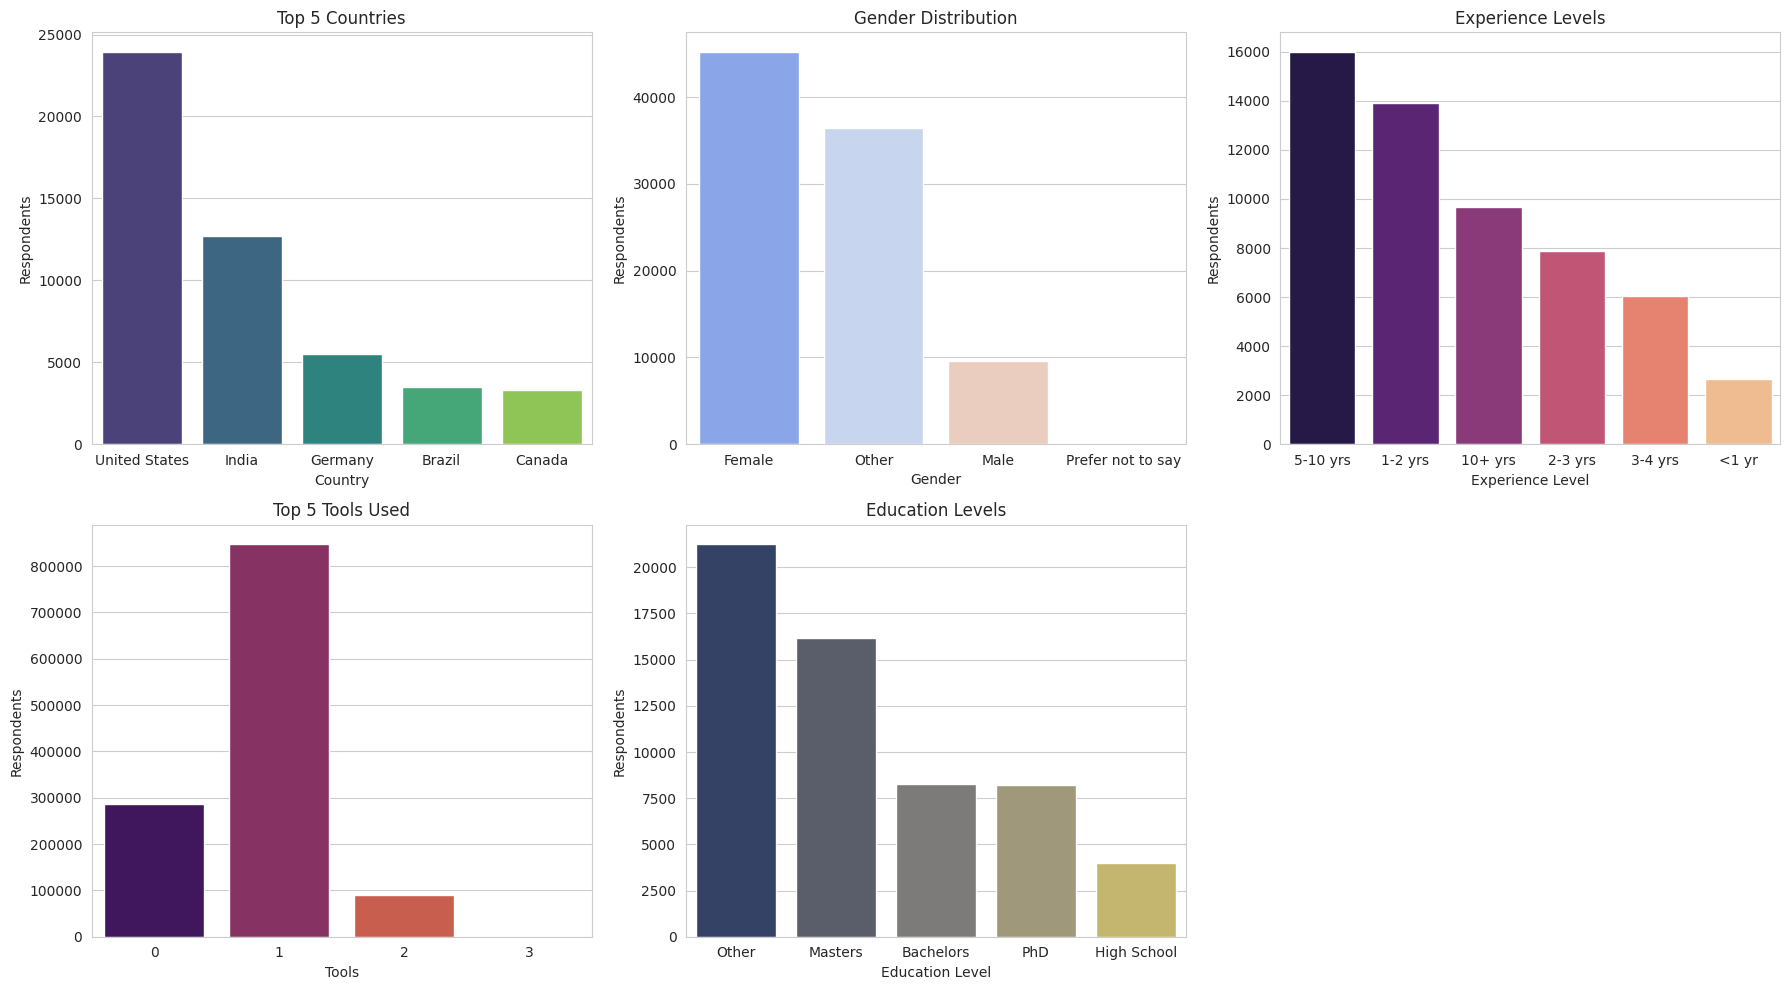

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# ---------- STEP 09: Visualizations ----------

fig, axs = plt.subplots(2, 3, figsize=(18,10))

# Top 5 Countries
sns.barplot(
    x=top_countries_readable.index,
    y=top_countries_readable.values,
    ax=axs[0,0],
    palette="viridis"
)
axs[0,0].set_title("Top 5 Countries")
axs[0,0].set_ylabel("Respondents")
axs[0,0].set_xlabel("Country")

# Gender Distribution
sns.barplot(
    x=gender_dist_readable.index,
    y=gender_dist_readable.values,
    ax=axs[0,1],
    palette="coolwarm"
)
axs[0,1].set_title("Gender Distribution")
axs[0,1].set_ylabel("Respondents")
axs[0,1].set_xlabel("Gender")

# Experience Levels
sns.barplot(
    x=experience_dist_readable.index,
    y=experience_dist_readable.values,
    ax=axs[0,2],
    palette="magma"
)
axs[0,2].set_title("Experience Levels")
axs[0,2].set_ylabel("Respondents")
axs[0,2].set_xlabel("Experience Level")

# Top 5 Tools Used
sns.barplot(
    x=tools_sum.index,
    y=tools_sum.values,
    ax=axs[1,0],
    palette="inferno"
)
axs[1,0].set_title("Top 5 Tools Used")
axs[1,0].set_ylabel("Respondents")
axs[1,0].set_xlabel("Tools")

# Education Levels
sns.barplot(
    x=education_dist_readable.index,
    y=education_dist_readable.values,
    ax=axs[1,1],
    palette="cividis"
)
axs[1,1].set_title("Education Levels")
axs[1,1].set_ylabel("Respondents")
axs[1,1].set_xlabel("Education Level")

# Remove empty subplot
fig.delaxes(axs[1,2])

plt.tight_layout()
plt.show()


In [14]:
# ---------- STEP 10: Export Cleaned Dataset + Summary Dashboard ----------

import os

# Create an output folder in Colab / GitHub repo
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

#  Export the cleaned dataset
cleaned_dataset_path = os.path.join(output_folder, "survey_2017_2021_cleaned.csv")
df.to_csv(cleaned_dataset_path, index=False)
print(f"✅ Cleaned dataset exported to: {cleaned_dataset_path}")

# Combine top insights into a single DataFrame
summary_data = {
    "Top 5 Countries": list(top_countries_readable.index),
    "Top Countries Count": list(top_countries_readable.values),
    "Gender Categories": list(gender_dist_readable.index),
    "Gender Count": list(gender_dist_readable.values),
    "Experience Categories": list(experience_dist_readable.index),
    "Experience Count": list(experience_dist_readable.values),
    "Education Categories": list(education_dist_readable.index),
    "Education Count": list(education_dist_readable.values),
    "Top Tools": list(tools_sum.index),
    "Top Tools Count": list(tools_sum.values)
}

summary_df = pd.DataFrame.from_dict(summary_data, orient='index').transpose()
summary_dashboard_path = os.path.join(output_folder, "survey_summary_dashboard.csv")
summary_df.to_csv(summary_dashboard_path, index=False)
print(f"✅ Summary dashboard exported to: {summary_dashboard_path}")

#    Provide direct download link in Colab
try:
    from google.colab import files
    files.download(cleaned_dataset_path)
    files.download(summary_dashboard_path)
except Exception:
    print("📌 Not running in Colab, download manually from the 'output' folder.")


✅ Cleaned dataset exported to: output/survey_2017_2021_cleaned.csv
✅ Summary dashboard exported to: output/survey_summary_dashboard.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# ---------- STEP 11: Display Summary Dashboard in Notebook ----------

import pandas as pd
from IPython.display import display

# Path to the summary dashboard exported in Step 10
summary_dashboard_path = "output/survey_summary_dashboard.csv"

# Read the CSV
summary_df = pd.read_csv(summary_dashboard_path)

# Display a clean table in the notebook
print("📊 Survey Summary Dashboard")
display(summary_df)


📊 Survey Summary Dashboard


,Top 5 Countries,Top Countries Count,Gender Categories,Gender Count,Experience Categories,Experience Count,Education Categories,Education Count,Top Tools,Top Tools Count
0,United States,23936.0,Female,45220.0,5-10 yrs,15995,Other,21237.0,1.0,846774.0
1,India,12682.0,Other,36508.0,1-2 yrs,13925,Masters,16167.0,0.0,286272.0
2,Germany,5532.0,Male,9560.0,10+ yrs,9683,Bachelors,8267.0,2.0,89105.0
3,Brazil,3502.0,Prefer not to say,74.0,2-3 yrs,7874,PhD,8224.0,3.0,1.0
4,Canada,3299.0,NaN,NaN,3-4 yrs,6064,High School,4013.0,NaN,NaN
5,NaN,NaN,NaN,NaN,<1 yr,2651,NaN,NaN,NaN,NaN


In [17]:
# ---------- STEP 11: Display Summary Dashboard & Readable Cleaned Dataset ----------

import pandas as pd
from IPython.display import display

# 1️⃣ Display Summary Dashboard
summary_dashboard_path = "output/survey_summary_dashboard.csv"
summary_df = pd.read_csv(summary_dashboard_path)

print("📊 Survey Summary Dashboard")
display(summary_df)

# 2️⃣ Display Readable Cleaned Dataset
readable_dataset_path = "output/survey_2017_2021_readable.csv"
df_readable = pd.read_csv(readable_dataset_path)

print("\n📋 Readable Cleaned Dataset (First 10 Rows)")
display(df_readable.head(10))


📊 Survey Summary Dashboard


,Top 5 Countries,Top Countries Count,Gender Categories,Gender Count,Experience Categories,Experience Count,Education Categories,Education Count,Top Tools,Top Tools Count
0,United States,23936.0,Female,45220.0,5-10 yrs,15995,Other,21237.0,1.0,846774.0
1,India,12682.0,Other,36508.0,1-2 yrs,13925,Masters,16167.0,0.0,286272.0
2,Germany,5532.0,Male,9560.0,10+ yrs,9683,Bachelors,8267.0,2.0,89105.0
3,Brazil,3502.0,Prefer not to say,74.0,2-3 yrs,7874,PhD,8224.0,3.0,1.0
4,Canada,3299.0,NaN,NaN,3-4 yrs,6064,High School,4013.0,NaN,NaN
5,NaN,NaN,NaN,NaN,<1 yr,2651,NaN,NaN,NaN,NaN



📋 Readable Cleaned Dataset (First 10 Rows)


,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,1,1170,12,NaN,NaN,13,NaN,NaN,2,2,...,0,0,1,0,0,1,0,1,0,0
1,0,1100,7,Other,United States,1,PhD,10+ yrs,0,0,...,2,1,2,2,2,2,2,2,1,2
2,0,996,7,Other,NaN,6,NaN,NaN,1,1,...,2,1,2,2,2,2,2,2,1,2
3,0,1113,1,Other,NaN,6,NaN,2-3 yrs,0,1,...,2,1,2,2,1,2,2,2,1,2
4,0,801,6,Other,NaN,2,NaN,NaN,0,1,...,2,1,2,2,2,2,2,2,1,2
5,0,995,6,Other,United States,2,PhD,NaN,0,1,...,2,1,2,2,2,2,2,2,1,2
6,0,12,2,NaN,United States,4,NaN,NaN,0,1,...,2,1,2,2,2,0,2,2,1,2
7,0,175,0,NaN,United States,11,Other,2-3 yrs,1,1,...,2,1,2,2,2,2,2,2,1,2
8,0,705,3,Other,United States,1,Masters,10+ yrs,0,1,...,2,1,2,2,2,2,2,2,1,2
9,0,263,1,Other,Canada,1,NaN,5-10 yrs,0,1,...,2,1,2,2,2,2,2,2,1,2
